PART1

In [ ]:
#importing all libraries
install.packages("ggplot2")
install.packages("fpp2")
install.packages("readr")
install.packages("lubridate")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’, ‘expsmooth’, ‘fma’, ‘forecast’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#loading library
library(ggplot2)
library(fpp2)
library(forecast)
library(readr)
library(lubridate)
library(tseries)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

── Attaching packages ────────────────────────────────────────────── fpp2 2.4 ──

✔ forecast  8.19     ✔ expsmooth 2.3 
✔ fma       2.4      



Loading required package: timechange

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [ ]:
#reading data
dataframe <- read_csv("/content/Departure.csv")
head(dataframe)

Rows: 153 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Month
dbl (1): departures '000

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Month,departures '000
<chr>,<dbl>
2010 January,732.4
2010 February,757.2
2010 March,919.6
2010 April,709.5
2010 May,977.9
2010 June,1183.1


In [ ]:
#data formatting
dataframe$Month = ym(dataframe$Month) 
head(dataframe)

Month,departures '000
<date>,<dbl>
2010-01-01,732.4
2010-02-01,757.2
2010-03-01,919.6
2010-04-01,709.5
2010-05-01,977.9
2010-06-01,1183.1


In [ ]:
#renaming columns
colnames(dataframe) <- c("Date", "departure")

In [ ]:
#departure is thousands
dataframe$departure = dataframe$departure * 1000
head(dataframe)

Date,departure
<date>,<dbl>
2010-01-01,732400
2010-02-01,757200
2010-03-01,919600
2010-04-01,709500
2010-05-01,977900
2010-06-01,1183100


In [ ]:
#checking for null values
colSums(is.na(dataframe))

Date departure 
        0         0

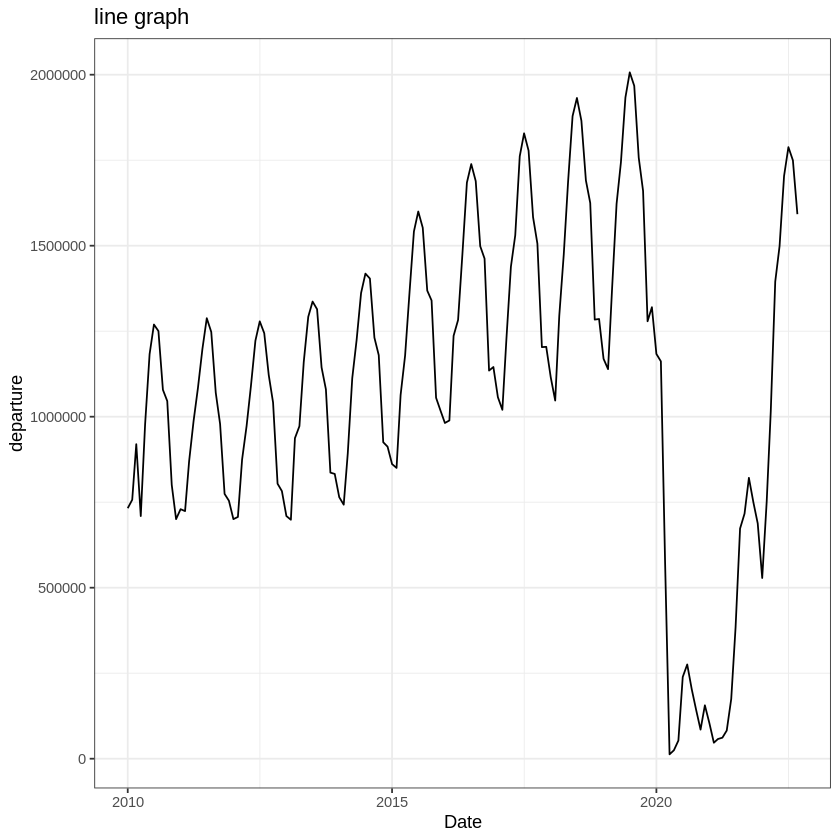

In [ ]:
#departure plot
ggplot(dataframe, aes(x=Date,y=departure))+
geom_line()+ 
 labs(x="Date",
         y="departure", 
       title="line graph")+ 
theme_bw()

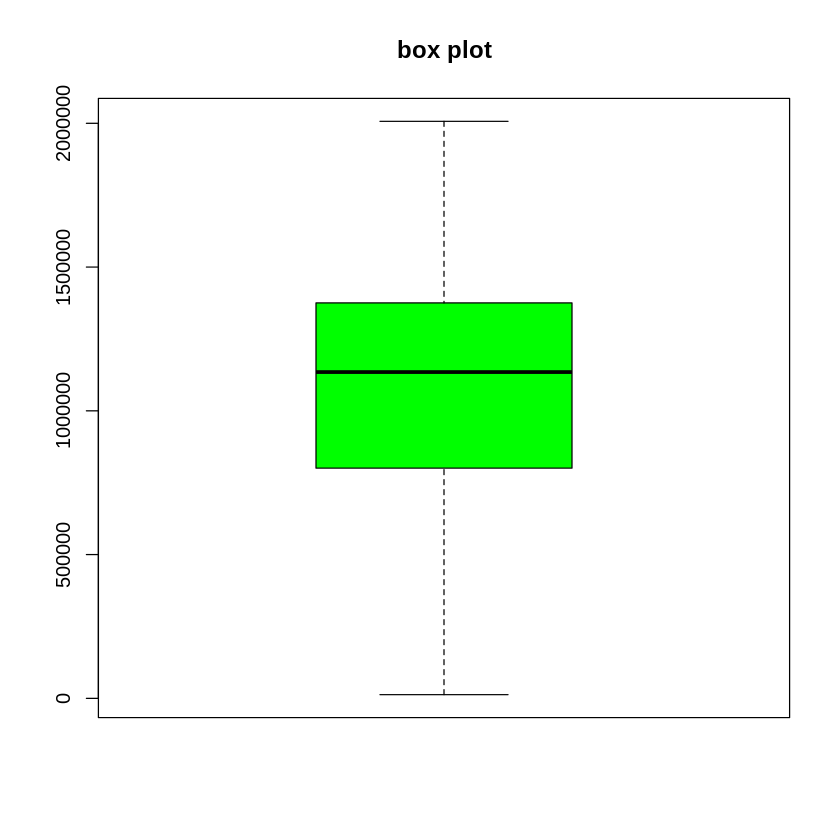

In [ ]:
#box plot of departure distribution
boxplot(dataframe$departure,main="box plot",col='green')

In [ ]:
#converting to time series data format
dataframe1 <- ts(dataframe[-1],start = c(2010, 1), end = c(2020,12), frequency = 12)

In [ ]:
dataframe1

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2010,732400,757200,919600,709500,977900,1183100,1269500,1250500,1078700,1045800,800700,700500
2011,729600,724000,869600,987900,1084200,1198500,1288000,1247800,1070300,978700,774300,754300
2012,700500,706900,874800,972600,1089600,1222300,1278800,1244200,1122100,1041300,804100,782400
2013,709500,698700,937300,972300,1160200,1292100,1336700,1314300,1144200,1079900,836500,832700
2014,764700,742800,892500,1112700,1223800,1361800,1418400,1403900,1231200,1179900,925400,912300
2015,861500,850300,1063400,1178500,1359900,1541700,1600000,1552500,1368800,1339800,1055400,1018600
2016,981700,989000,1236500,1282800,1475700,1684600,1738700,1688900,1498600,1462300,1134900,1145300
2017,1057100,1020200,1227700,1438700,1530600,1761500,1828600,1778100,1583600,1505900,1203500,1204300
2018,1115600,1047300,1294600,1473800,1687400,1879000,1932000,1865200,1691000,1624900,1284000,1285700
2019,1169300,1139100,1375400,1622600,1744000,1933400,2006900,1967500,1757400,1660100,1279100,1320200


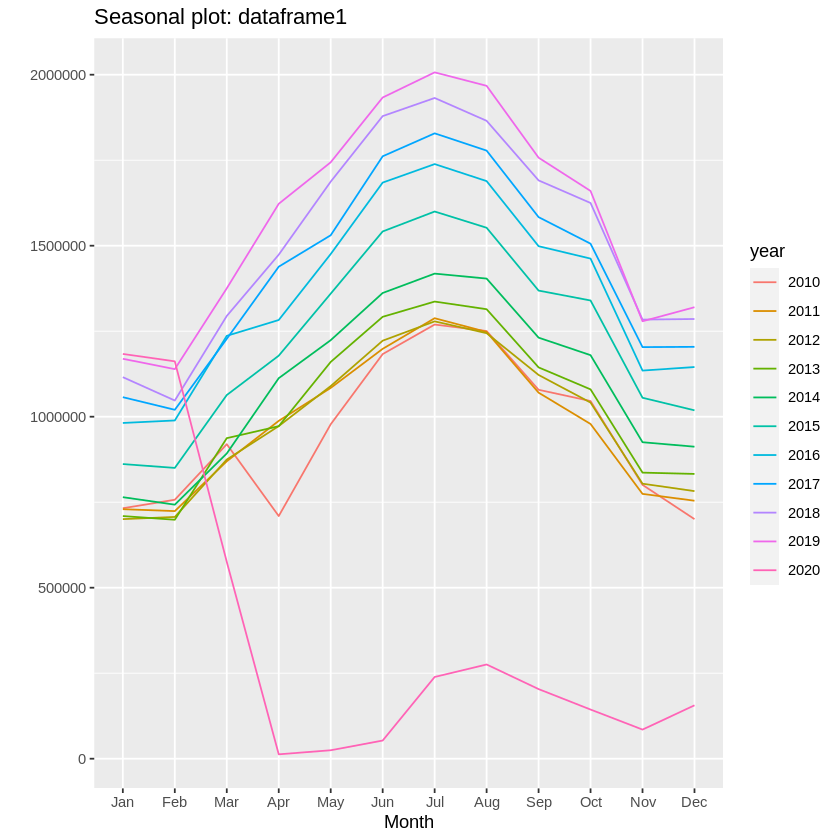

In [ ]:
ggseasonplot(dataframe1)

[1] 2010    1

[1] 2020   12

[1] 12

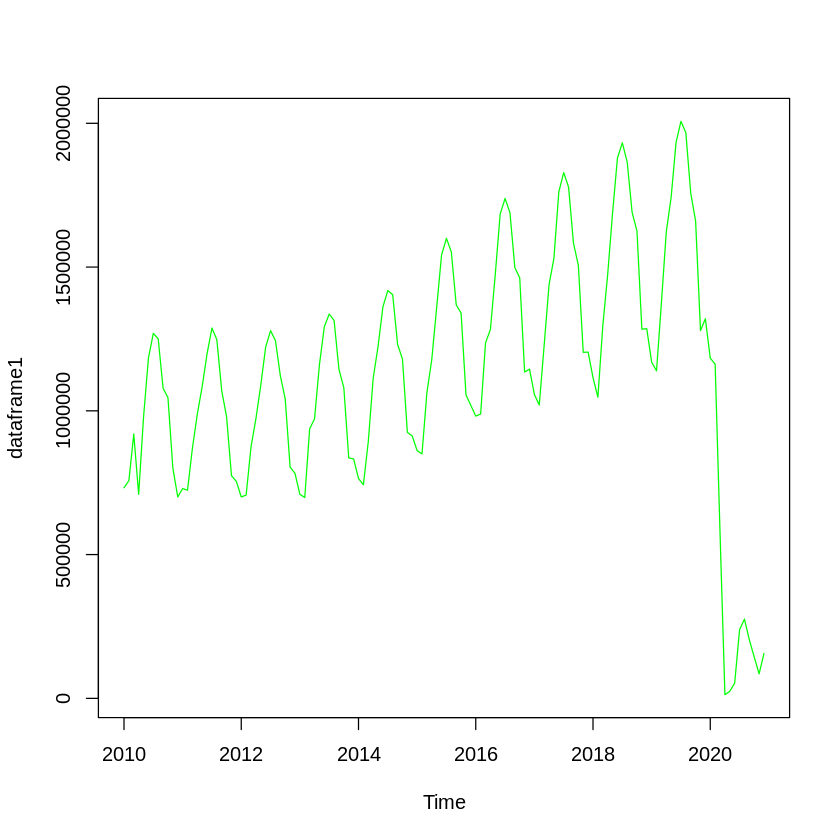

In [ ]:
plot(dataframe1, col = "green")
start(dataframe1)
end(dataframe1)
frequency(dataframe1)

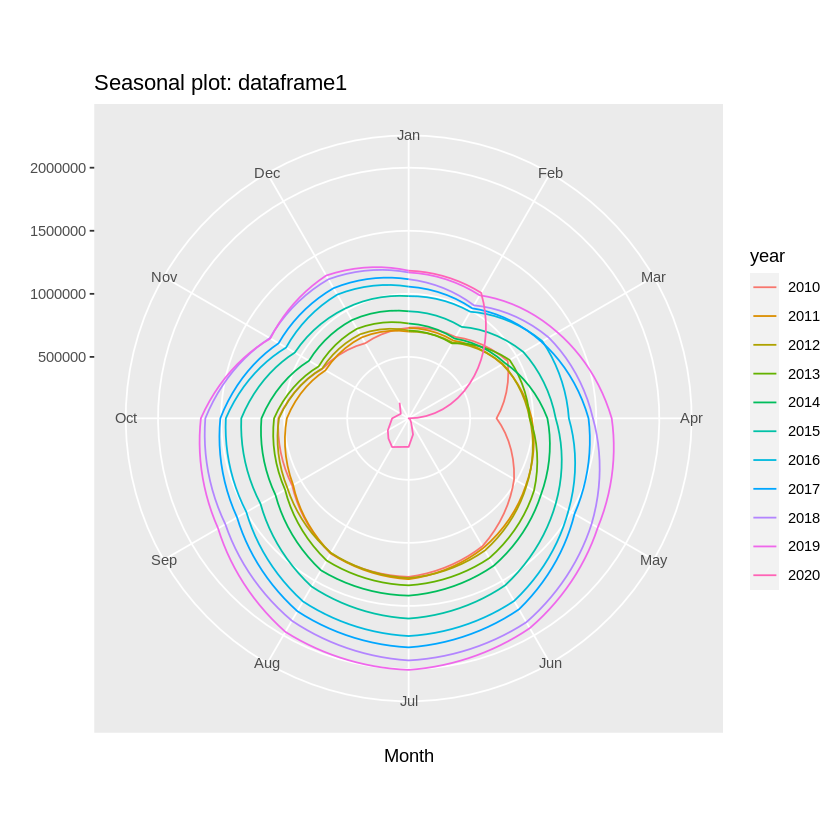

In [ ]:
ggseasonplot(dataframe1,polar=TRUE)

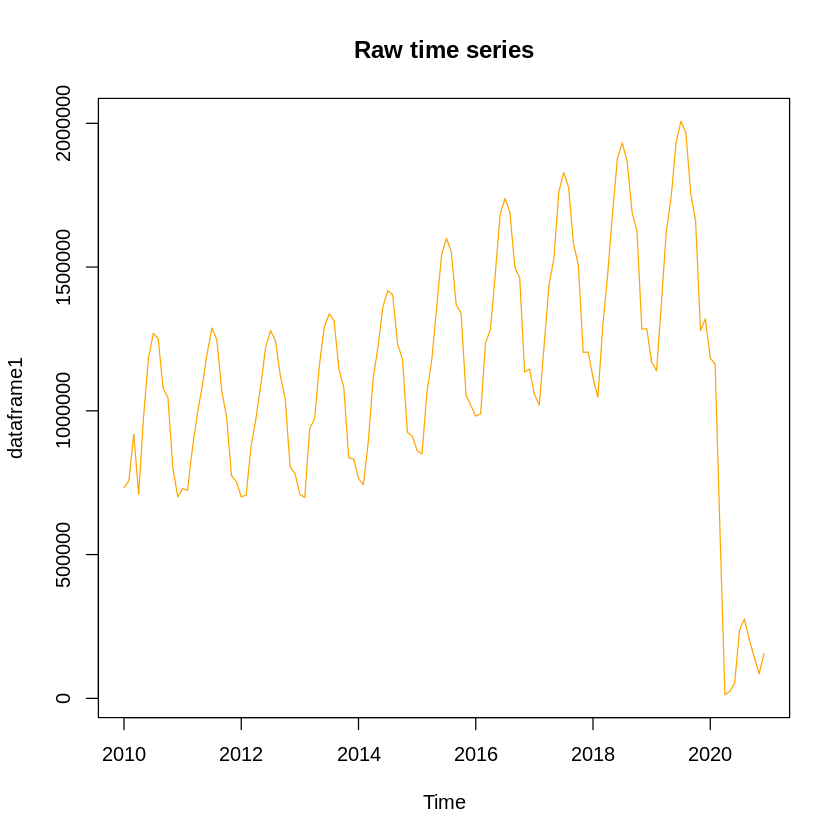

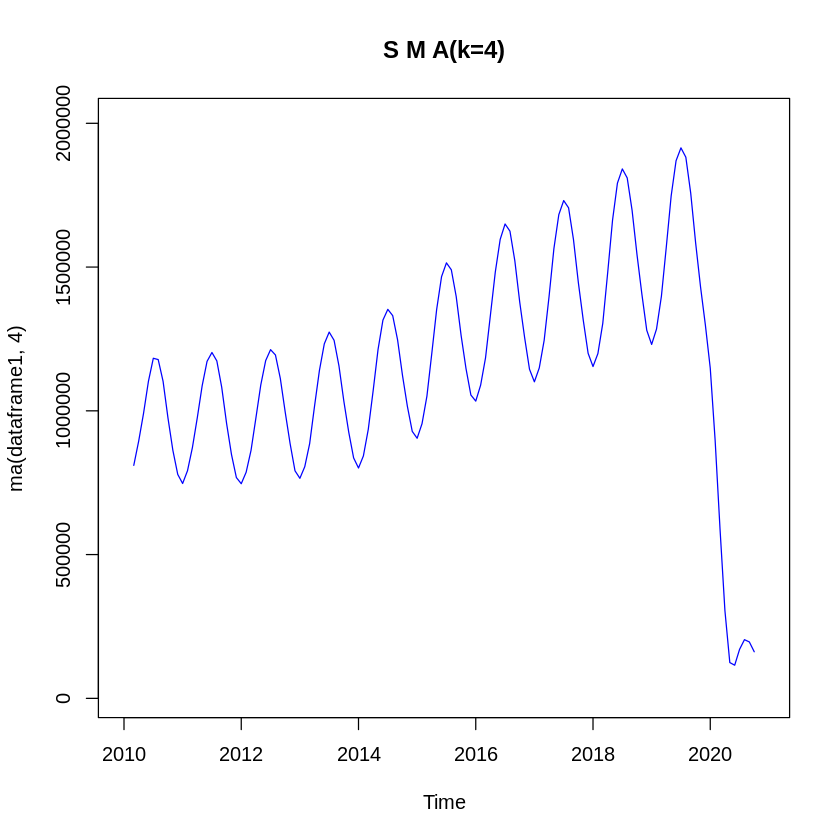

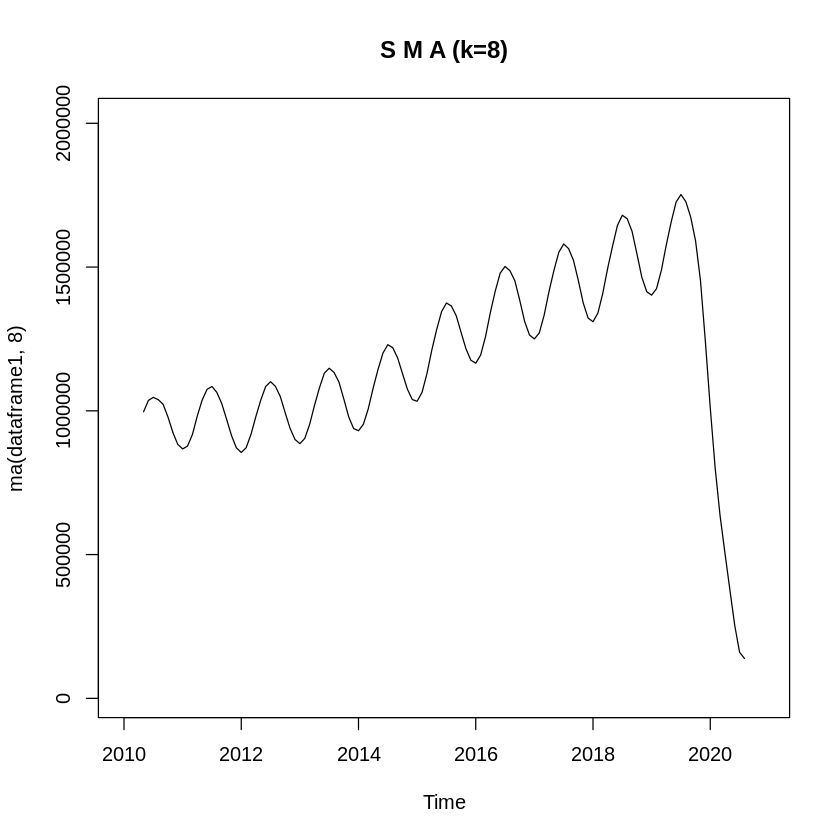

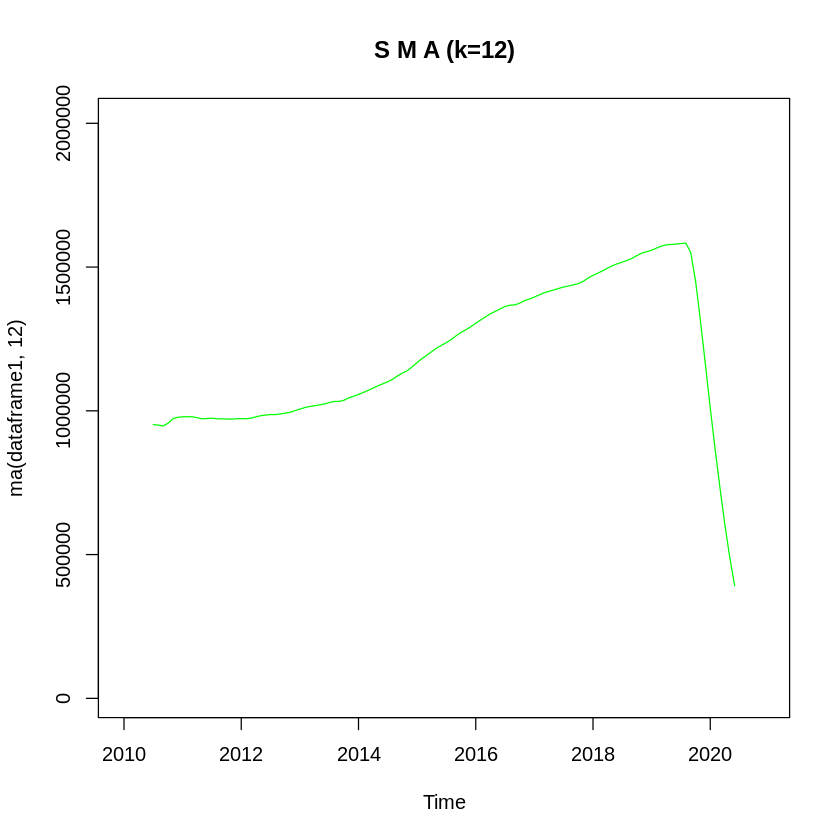

In [ ]:
#time series moving average plot with different k values
orgpar <- par(no.readonly =TRUE) 
par(mfrow = c(1,1))
ylim <- c(min(dataframe1), max(dataframe1)) 
plot(dataframe1, main = "Raw time series", col = "orange")
plot(ma(dataframe1, 4), main = "S M A(k=4)", ylim = ylim, col = "blue") 
plot(ma(dataframe1, 8), main = "S M A (k=8)", ylim = ylim, col = "black") 
plot(ma(dataframe1, 12), main = "S M A (k=12)", ylim = ylim, col = "green") 
par(orgpar)

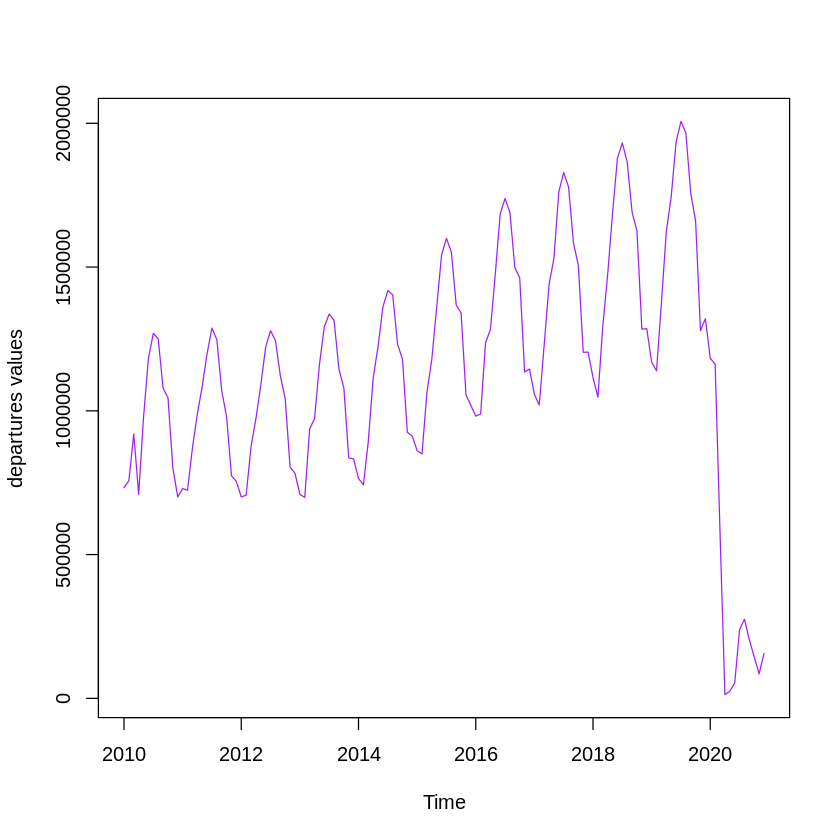

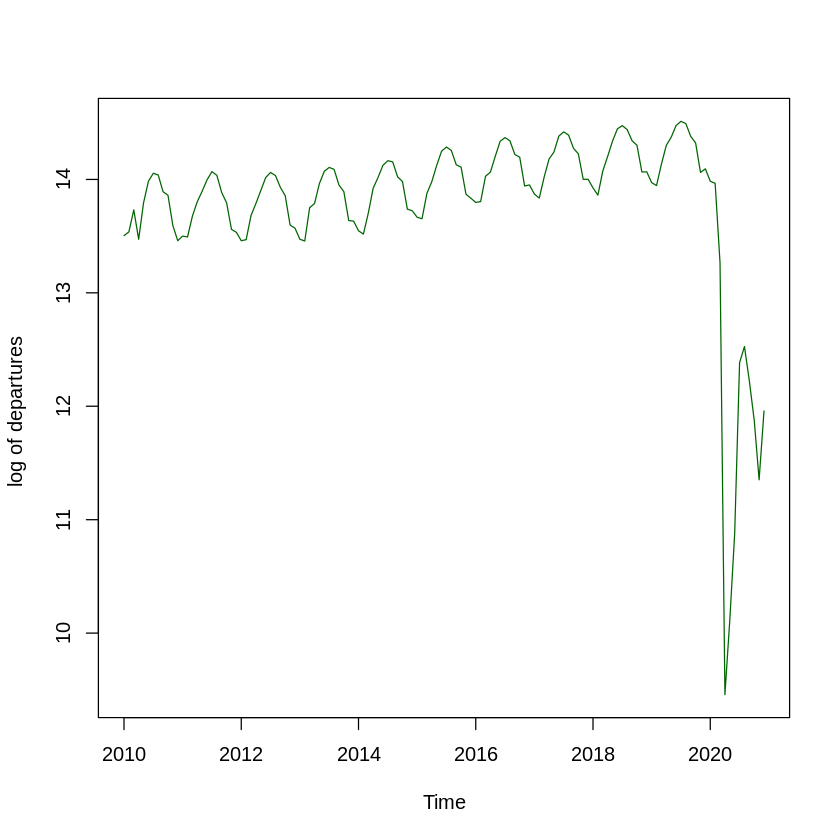

In [ ]:
plot(dataframe1, ylab="departures values", col='purple')
lagdataframe1 <- log(dataframe1)
plot(lagdataframe1, ylab="log of departures ", col='darkgreen')

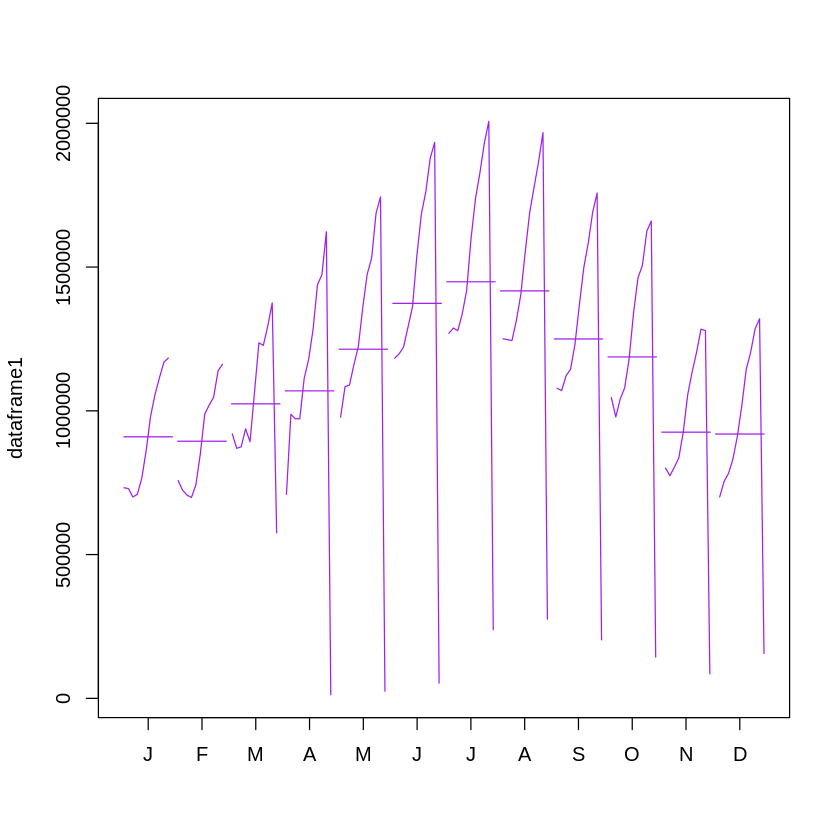

In [ ]:
monthplot(dataframe1, col = "purple")

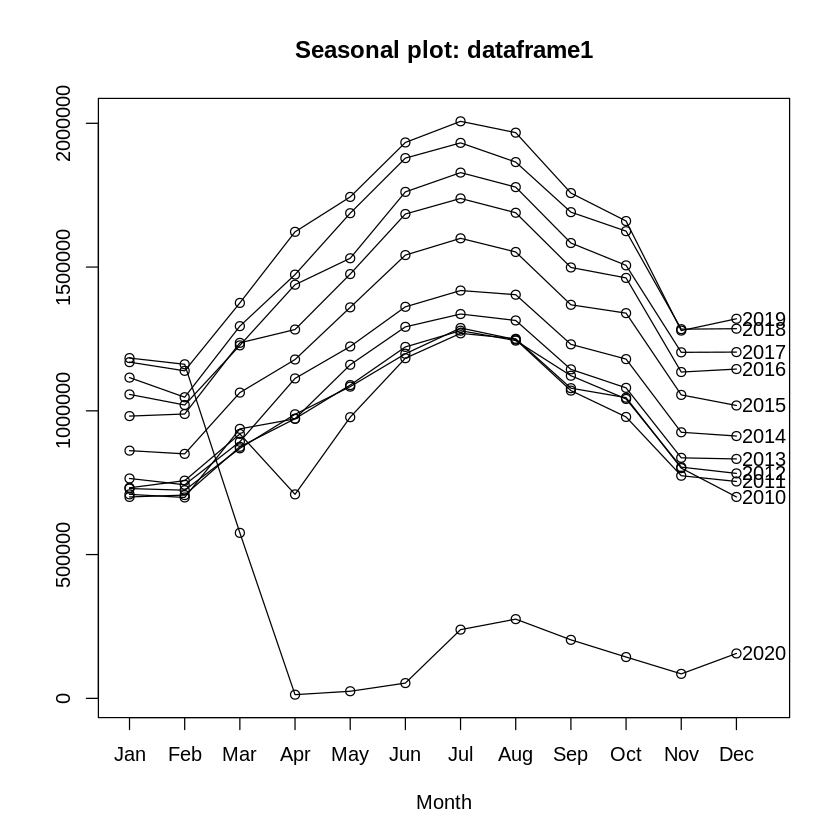

In [ ]:
seasonplot(dataframe1, year.labels="TRUE")

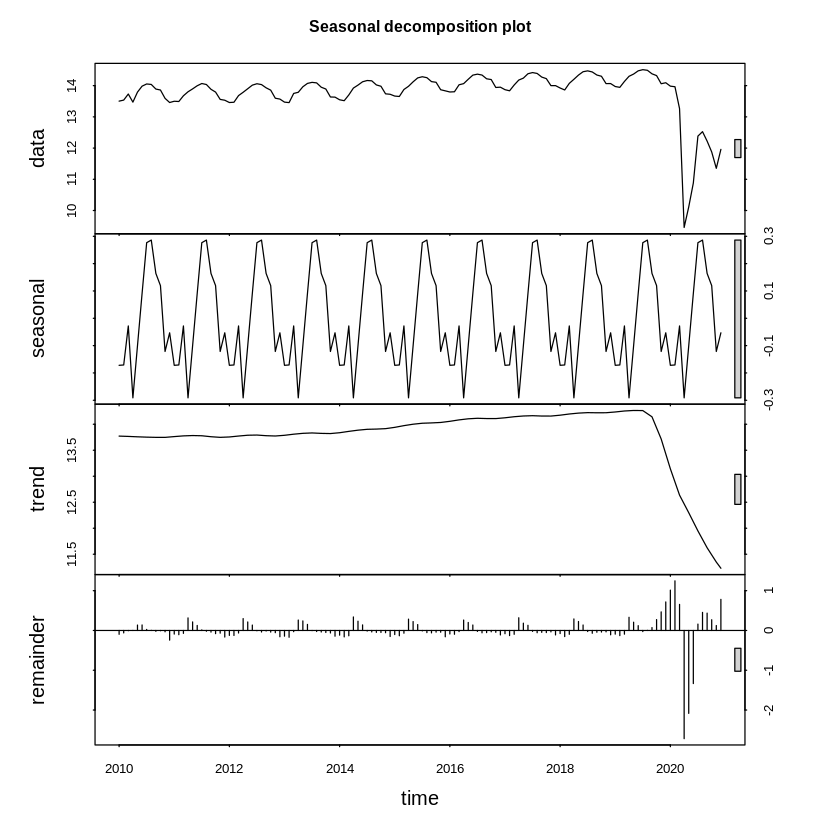

In [ ]:
lagmod <- stl(lagdataframe1, s.window="period")
plot(lagmod, main="Seasonal decomposition plot")

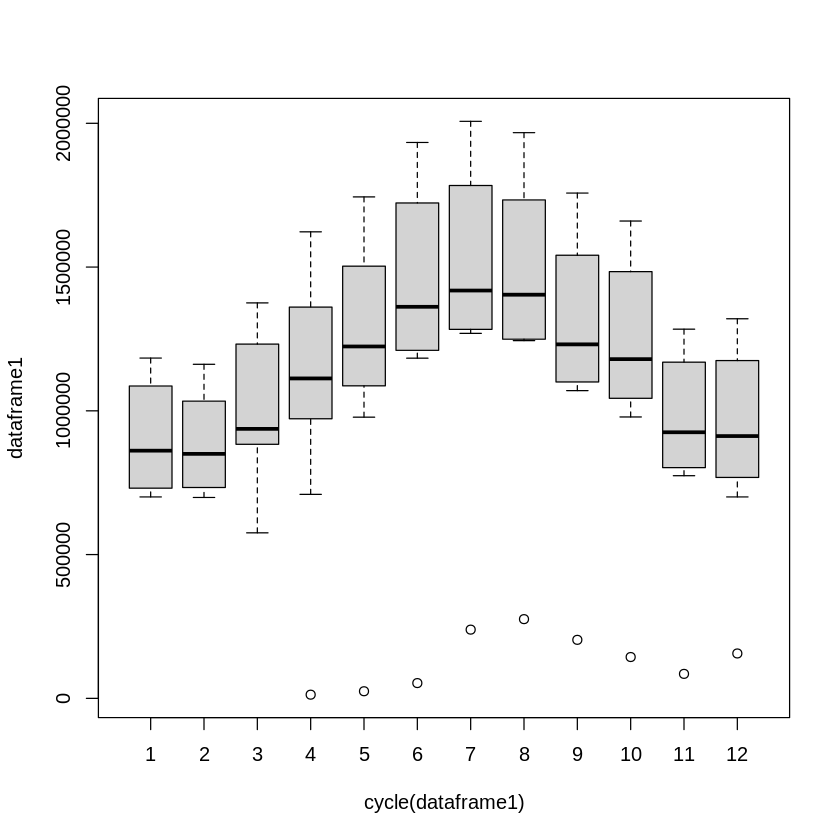

In [ ]:
boxplot(dataframe1 ~ cycle(dataframe1))

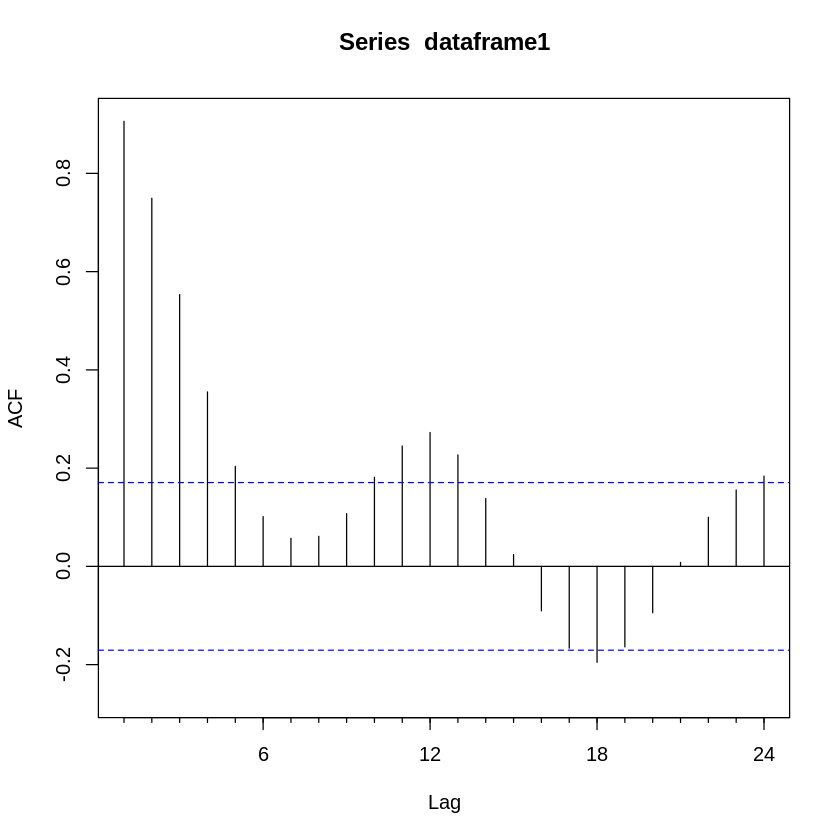

In [ ]:
Acf(dataframe1)

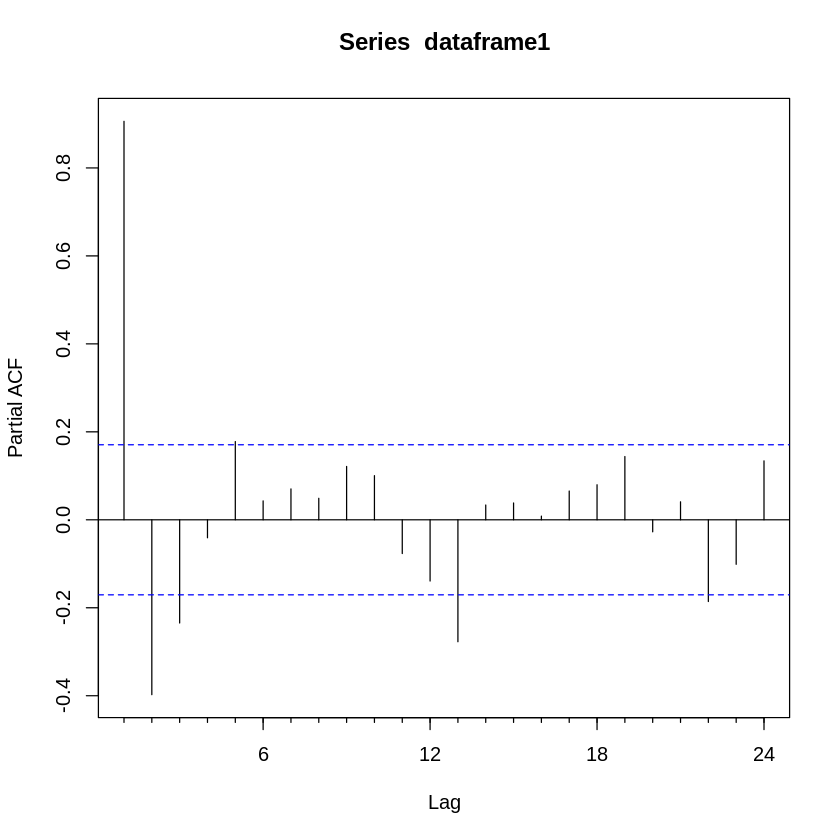

In [ ]:
Pacf(dataframe1)

 Holt-Winters exponential smoothing

In [ ]:
hwexponentialmodel1 <- HoltWinters(dataframe1)

In [ ]:
summary(hwexponentialmodel1)

             Length Class  Mode     
fitted       480    mts    numeric  
x            132    ts     numeric  
alpha          1    -none- numeric  
beta           1    -none- numeric  
gamma          1    -none- numeric  
coefficients  14    -none- numeric  
seasonal       1    -none- character
SSE            1    -none- numeric  
call           2    -none- call     

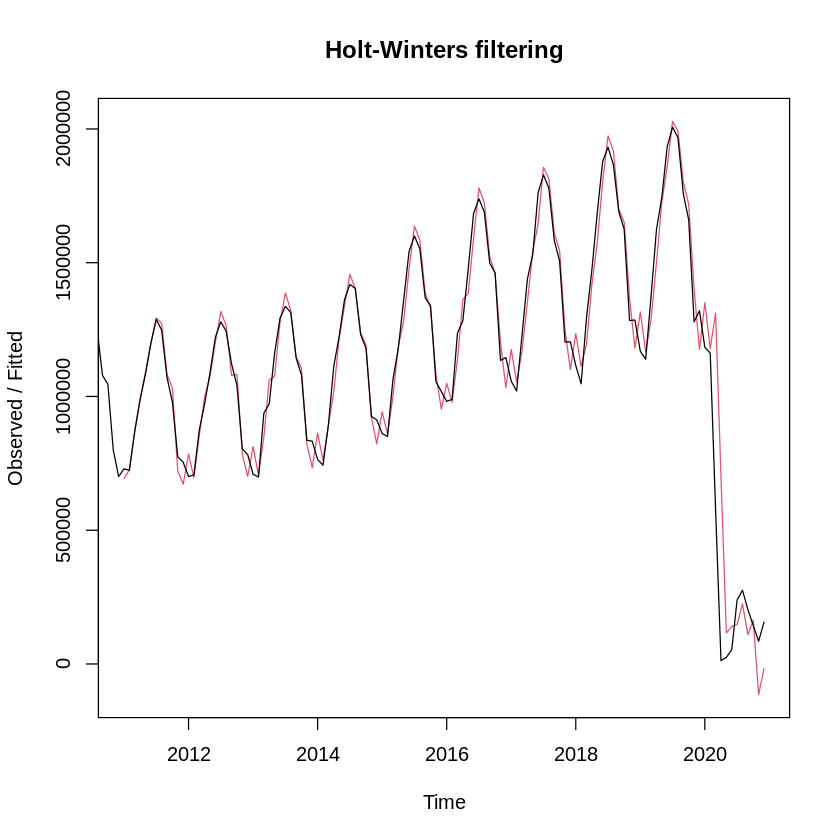

In [ ]:
plot(hwexponentialmodel1)

In [ ]:
pred <- predict(hwexponentialmodel1, 6)

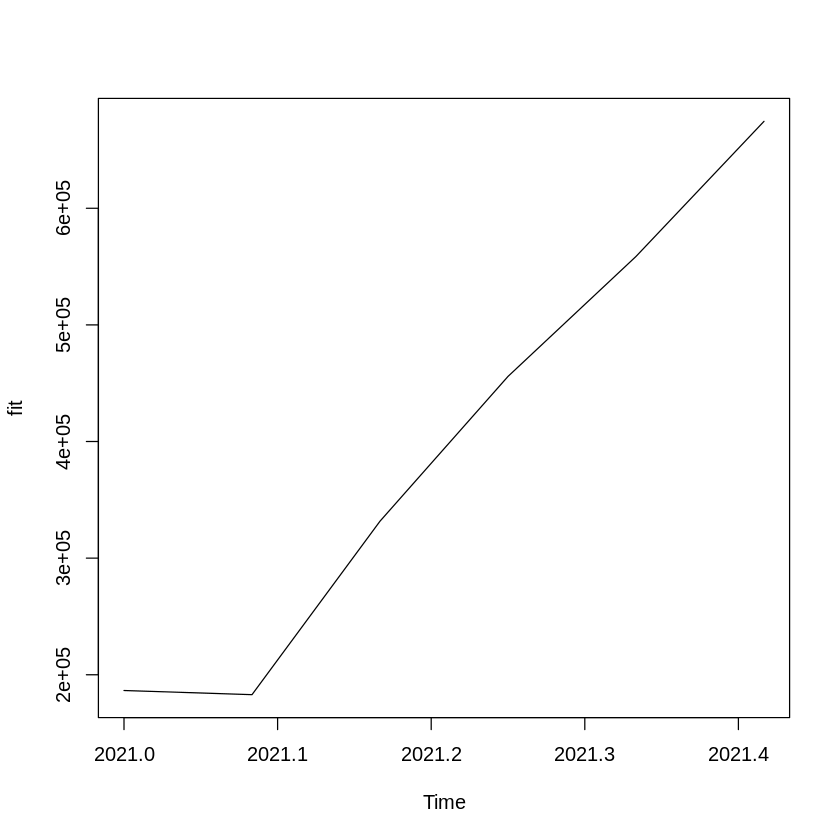

In [ ]:
plot(pred)

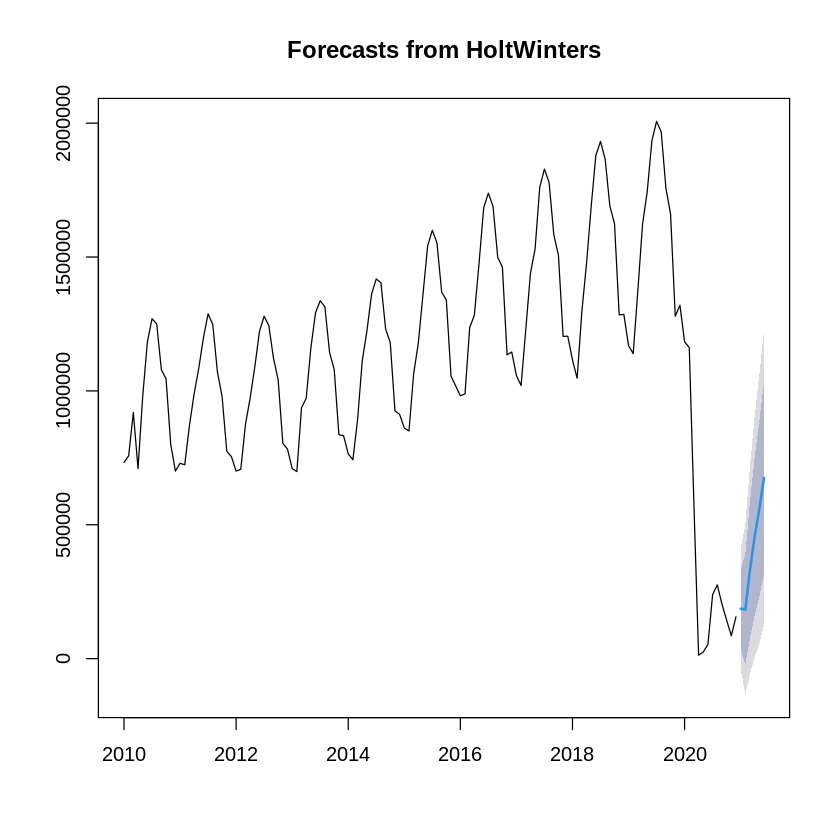

In [ ]:
plot(forecast(hwexponentialmodel1, 6))

Warning message in modeldf.default(object):
“Could not find appropriate degrees of freedom for this model.”


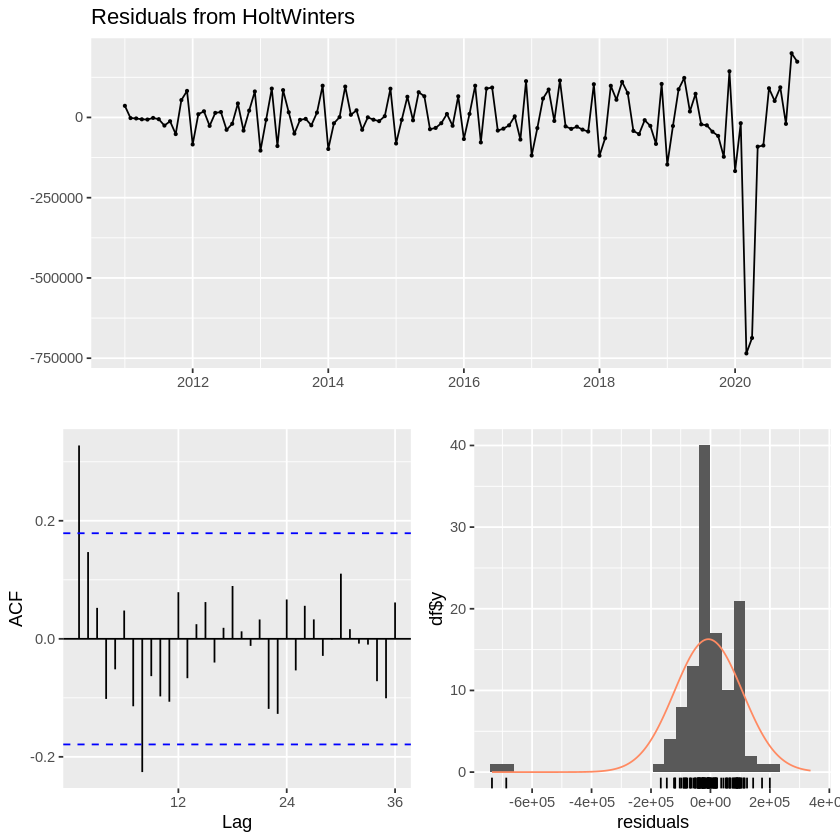

In [ ]:
checkresiduals(hwexponentialmodel1)

Sarima Forecasting Model

In [ ]:
#Augmented Dickey-Fuller Test
adf.test(dataframe1)


	Augmented Dickey-Fuller Test

data:  dataframe1
Dickey-Fuller = -1.5447, Lag order = 5, p-value = 0.7658
alternative hypothesis: stationary


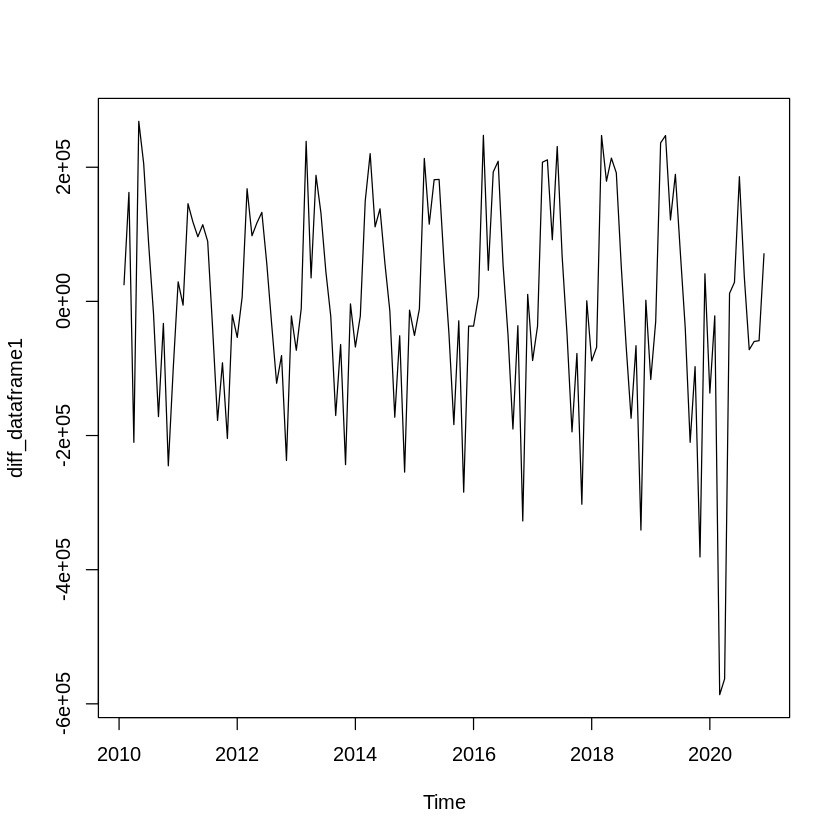

In [ ]:
#making data stationary
diff_dataframe1 = diff(dataframe1, differences = 1)
plot(diff_dataframe1)

In [ ]:
adf.test(diff_dataframe1)

Warning message in adf.test(diff_dataframe1):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  diff_dataframe1
Dickey-Fuller = -7.2297, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary


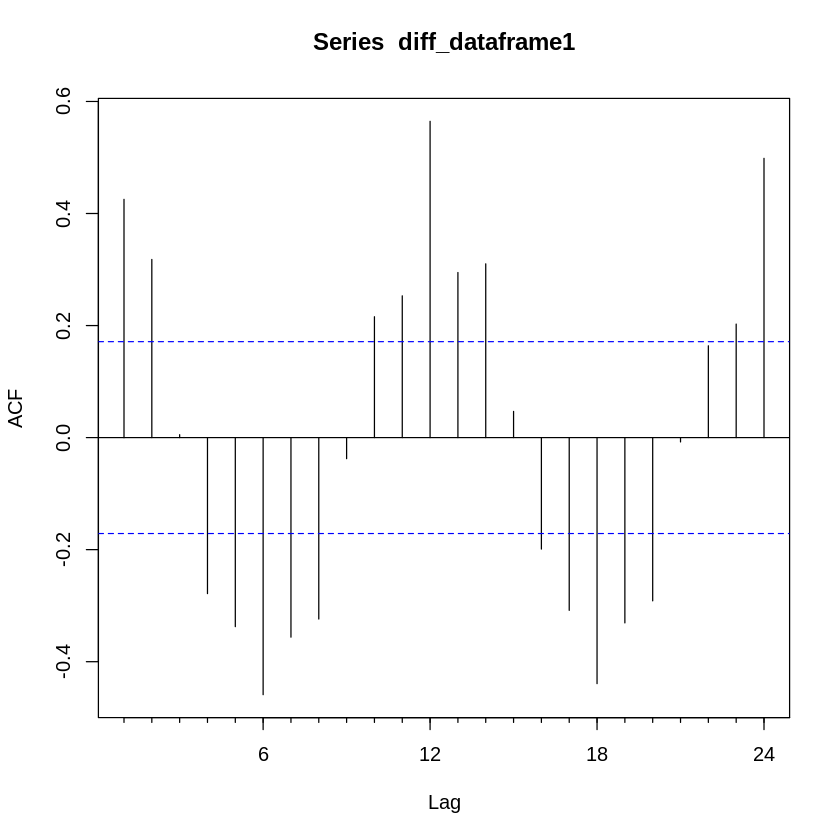

In [ ]:
Acf(diff_dataframe1)

In [ ]:
#sarima model - seasonal data 
sarimamodel = auto.arima(diff_dataframe1,
                    seasonal=TRUE)
summary(sarimamodel)

Series: diff_dataframe1 
ARIMA(1,0,0)(0,1,1)[12] 

Coefficients:
         ar1     sma1
      0.3966  -0.8274
s.e.  0.0837   0.2045

sigma^2 = 1.131e+10:  log likelihood = -1552.1
AIC=3110.21   AICc=3110.41   BIC=3118.54

Training set error measures:
                    ME   RMSE      MAE      MPE     MAPE      MASE        ACF1
Training set -4262.399 100492 50596.08 64.42085 134.8008 0.9082032 -0.00228335

In [ ]:
pred2 = forecast(sarimamodel, 6)
pred2

         Point Forecast       Lo 80     Hi 80      Lo 95    Hi 95
Jan 2021      -51649.88 -188397.876  85098.13 -260787.89 157488.1
Feb 2021      -10031.13 -156996.331 136934.06 -234795.01 214732.7
Mar 2021       74241.66  -74282.259 222765.58 -152906.07 301389.4
Apr 2021       13335.73 -135431.855 162103.31 -214184.66 240856.1
May 2021      130766.89  -18038.980 279572.76  -96812.05 358345.8
Jun 2021      153909.49    5097.606 302721.38  -73678.65 381497.6

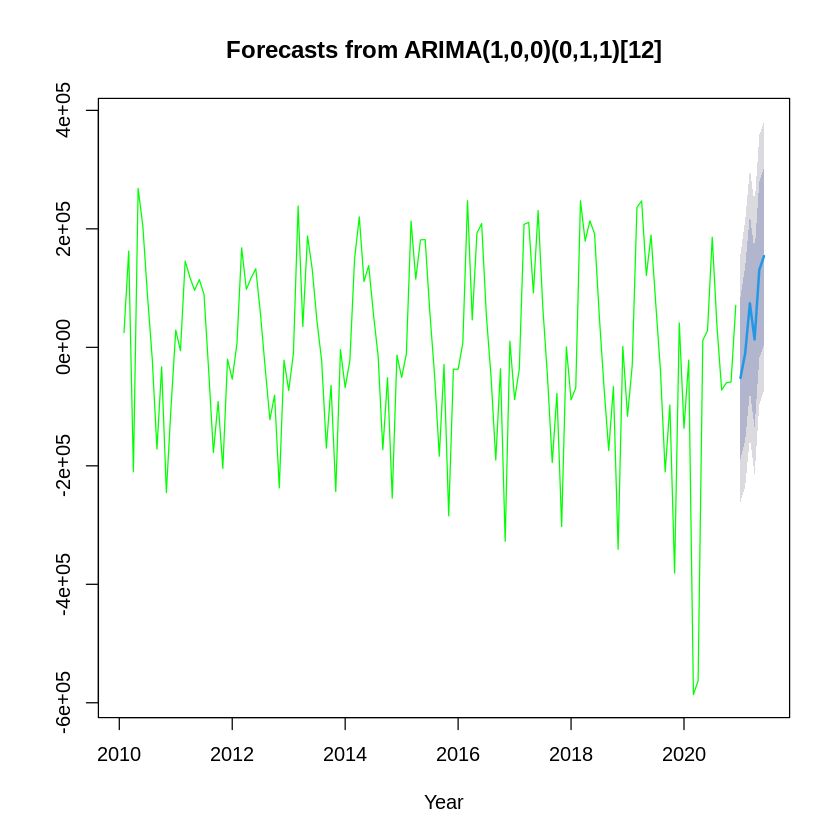

In [ ]:
#future forecasting
plot(forecast(sarimamodel, 6), xlab="Year", col="green")


	Box-Ljung test

data:  sarimamodel$residuals
X-squared = 0.00069875, df = 1, p-value = 0.9789


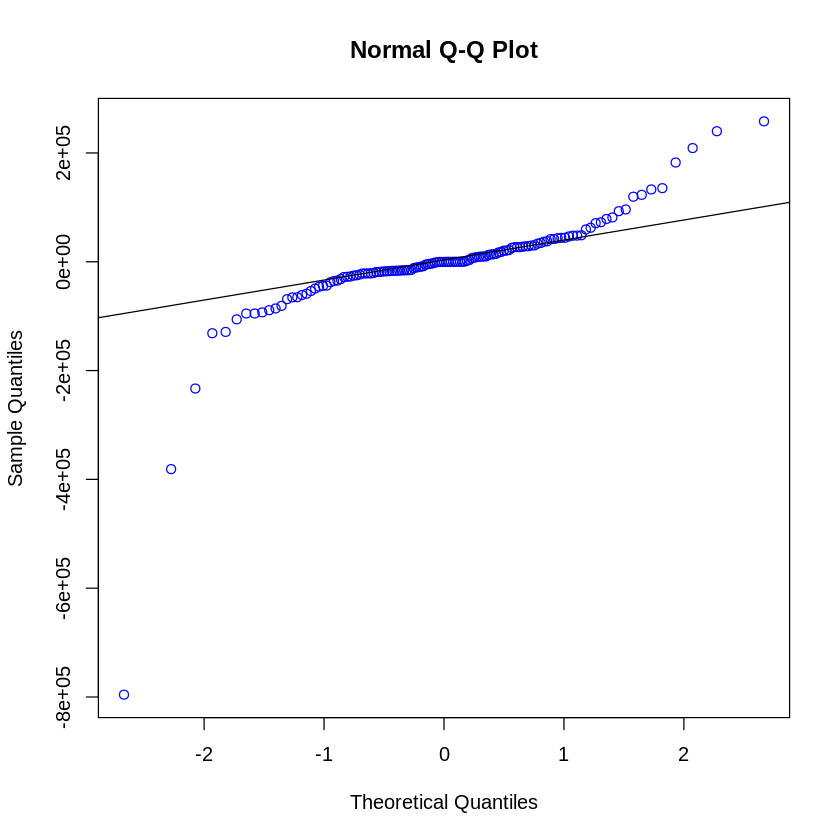

In [ ]:
# EVALUATING MODEL
qqnorm(sarimamodel$residuals, col="blue")
qqline(sarimamodel$residuals)
Box.test(sarimamodel$residuals, type="Ljung-Box")


	Ljung-Box test

data:  Residuals from ARIMA(1,0,0)(0,1,1)[12]
Q* = 5.2049, df = 22, p-value = 0.9999

Model df: 2.   Total lags used: 24



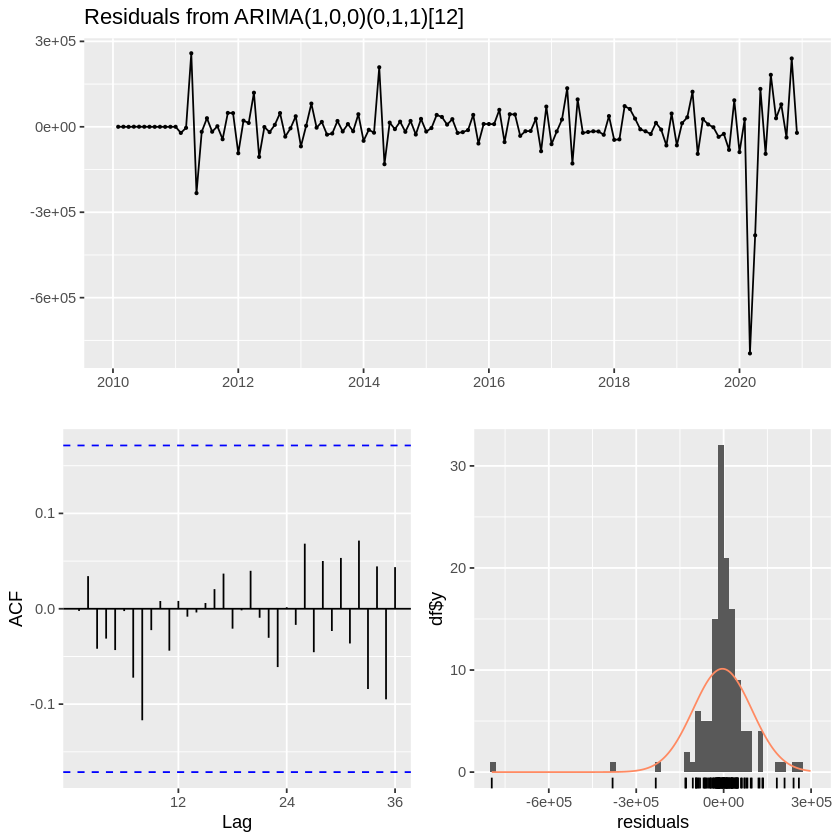

In [ ]:
checkresiduals(sarimamodel)

Simple Naive Forecasting


Forecast method: Seasonal naive method

Model Information:
Call: snaive(y = dataframe1, h = 6) 

Residual sd: 448230.1456 

Error measures:
                    ME     RMSE      MAE       MPE   MAPE MASE      ACF1
Training set -60924.17 448230.1 192899.2 -232.9477 243.34    1 0.9344325

Forecasts:
         Point Forecast       Lo 80   Hi 80     Lo 95     Hi 95
Jan 2021        1183500  609069.955 1757930  304985.1 2062014.9
Feb 2021        1161900  587469.955 1736330  283385.1 2040414.9
Mar 2021         575600    1169.955 1150030 -302914.9 1454114.9
Apr 2021          12800 -561630.045  587230 -865714.9  891314.9
May 2021          24700 -549730.045  599130 -853814.9  903214.9
Jun 2021          53100 -521330.045  627530 -825414.9  931614.9

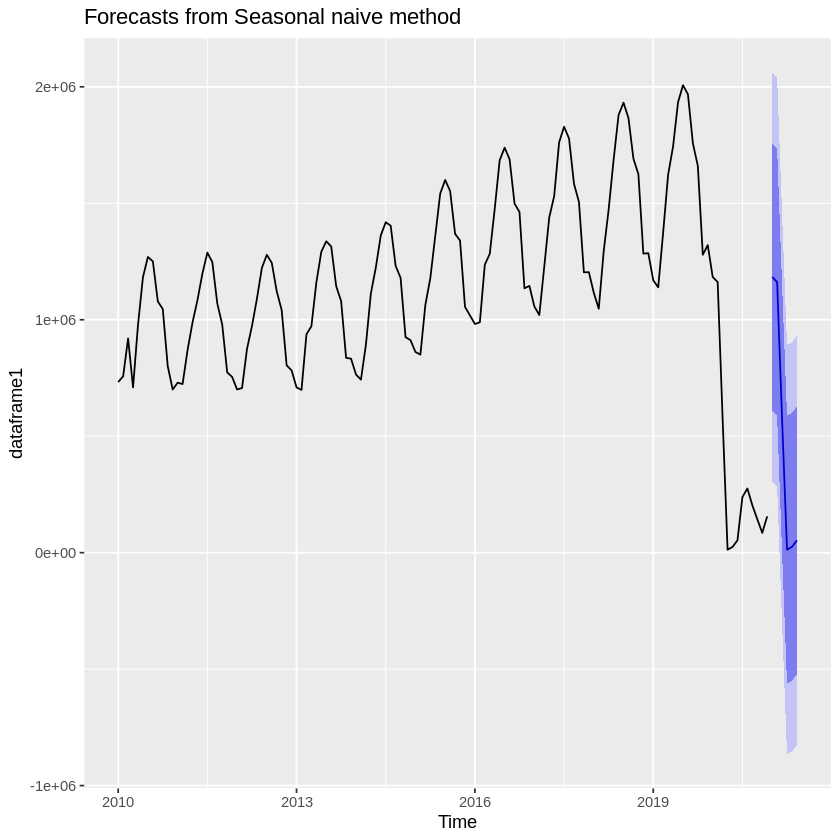

In [ ]:
nvmodel<-snaive(dataframe1,h=6)
autoplot(nvmodel)
summary(nvmodel)  


	Ljung-Box test

data:  Residuals from Seasonal naive method
Q* = 361.23, df = 24, p-value < 2.2e-16

Model df: 0.   Total lags used: 24



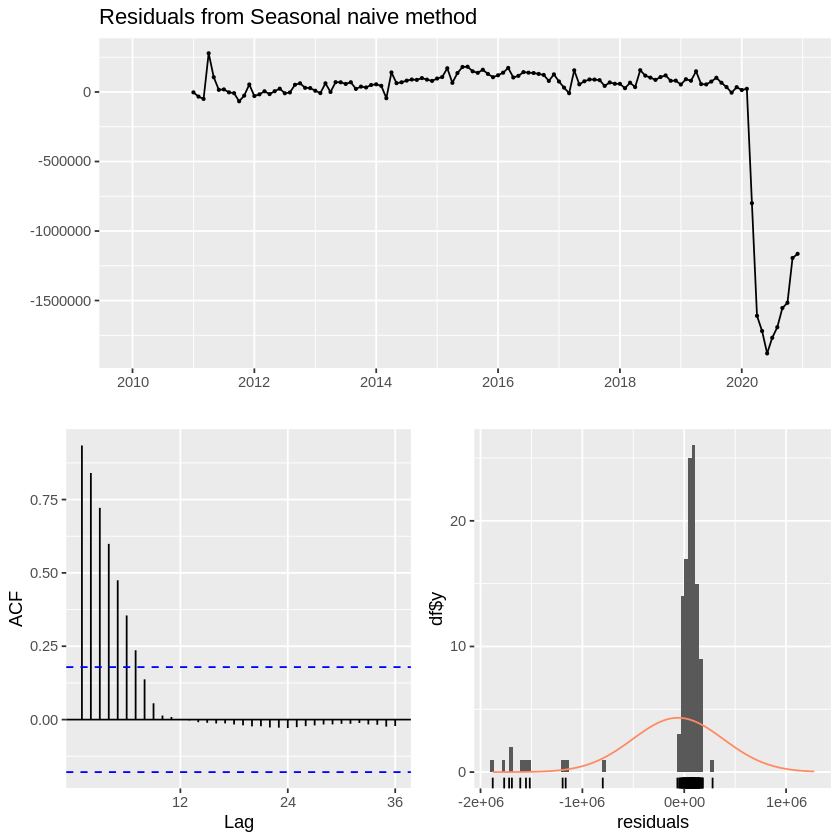

In [ ]:
checkresiduals(nvmodel)

**Part2**

In [ ]:
#installing packages
install.packages("corrplot")
install.packages("caret")
install.packages("class")
install.packages("caTools")
install.packages("party")
install.packages("PRROC")
install.packages("kernlab")
install.packages("ROSE")
install.packages("cvms")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘TH.data’, ‘libcoin’, ‘matrixStats’, ‘multcomp’, ‘mvtnorm’, ‘modeltools’, ‘strucchange’, ‘coin’, ‘sandwich’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/l

In [ ]:
library(caret)
library(tidyverse)
library(dplyr)
library(corrplot)
library(rpart)
library(class)
library(caTools)
library(party)
library(PRROC)
library(pROC)
library(kernlab)
library(ROSE)
library(cvms)

Loading required package: lattice

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ purrr   0.3.5      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ lubridate::date()        masks base::date()
✖ dplyr::filter()          masks stats::filter()
✖ lubridate::intersect()   masks base::intersect()
✖ dplyr::lag()             masks stats::lag()
✖ purrr::lift()            masks caret::lift()
✖ lubridate::setdiff()     masks base::setdiff()
✖ lubridate::union()       masks base::union()

corrplot 0.92 loaded

Loading required package: grid

Loading required package: mvtnorm

Loading required package: modeltools

Loading required package: stats4

Loading required package: strucchange

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘

In [ ]:
#loading bank dataframe
bank_dataframe <- read_csv("/content/bank.csv")
head(bank_dataframe)

Rows: 45211 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): job, marital, education, default, housing, loan, contact, month, p...
dbl  (7): age, balance, day, duration, campaign, pdays, previous

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no


In [ ]:

bank_dataframe = bank_dataframe[1:15000,]

In [ ]:
summary(bank_dataframe)

      age            job              marital           education        
 Min.   :20.00   Length:15000       Length:15000       Length:15000      
 1st Qu.:33.00   Class :character   Class :character   Class :character  
 Median :39.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :40.69                                                           
 3rd Qu.:48.00                                                           
 Max.   :61.00                                                           
   default             balance        housing              loan          
 Length:15000       Min.   :-8019   Length:15000       Length:15000      
 Class :character   1st Qu.:   31   Class :character   Class :character  
 Mode  :character   Median :  346   Mode  :character   Mode  :character  
                    Mean   : 1107                                        
                    3rd Qu.: 1152                                        
                    Max.   :58932     

In [ ]:
#finding null values 
colSums(is.na(bank_dataframe))

age       job   marital education   default   balance   housing      loan 
        0         0         0         0         0         0         0         0 
  contact       day     month  duration  campaign     pdays  previous  poutcome 
        0         0         0         0         0         0         0         0 
        y 
        0

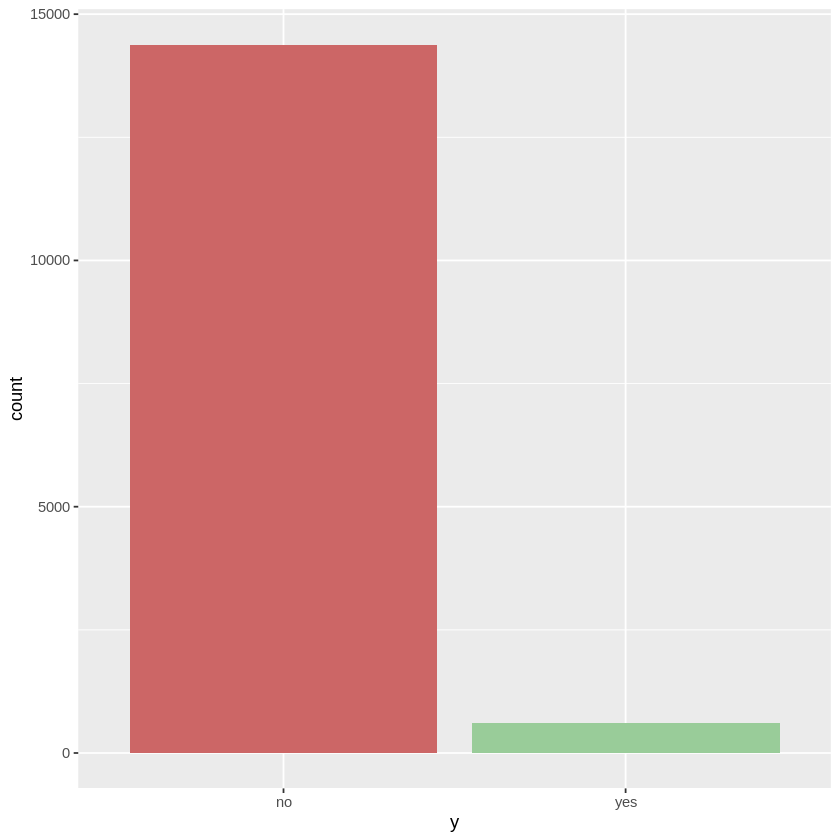

In [ ]:
#count plot of target class
ggplot(data=bank_dataframe, aes(x=y))+
  geom_bar( fill=c("#CC6666", "#99CC99")) +
  scale_fill_gradient(low = "green", high = "red")

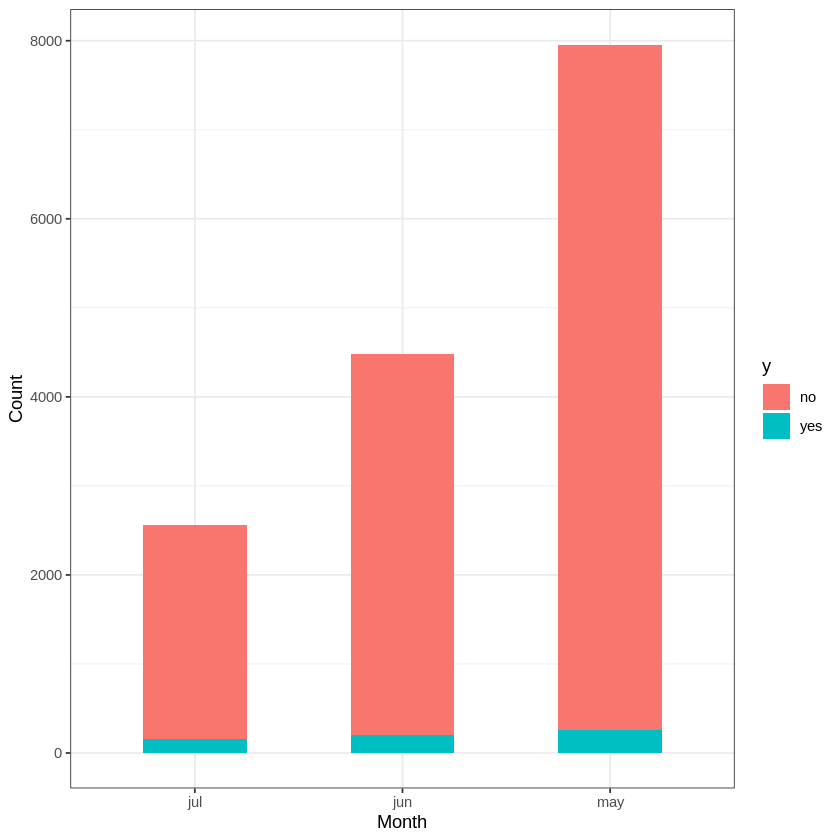

In [ ]:
#target and month wise count
ggplot(bank_dataframe, aes(month,fill=y))+
geom_bar(stat="count",position='stack', width = 0.5)+  # Stack for stacked chart
 labs(x="Month",
         y="Count")+ 
theme_bw()

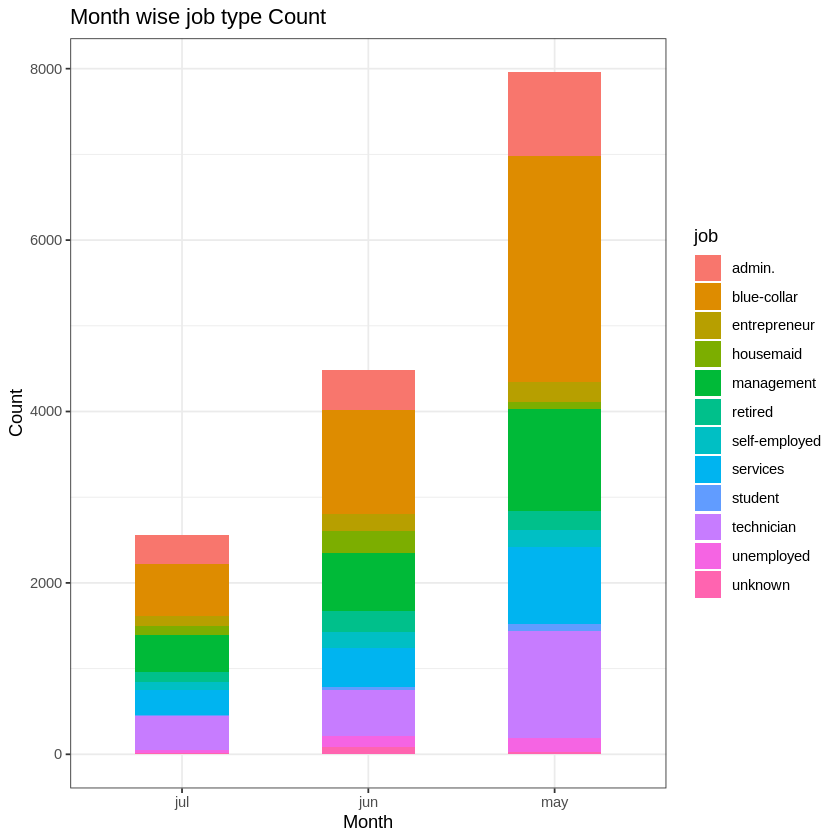

In [ ]:
#month and job wise count plot
ggplot(bank_dataframe, aes(month,fill=job))+
geom_bar(stat="count",position='stack', width = 0.5)+  # Stack for stacked chart
 labs(x="Month",
         y="Count", 
       title="Month wise job type Count")+ 
theme_bw()

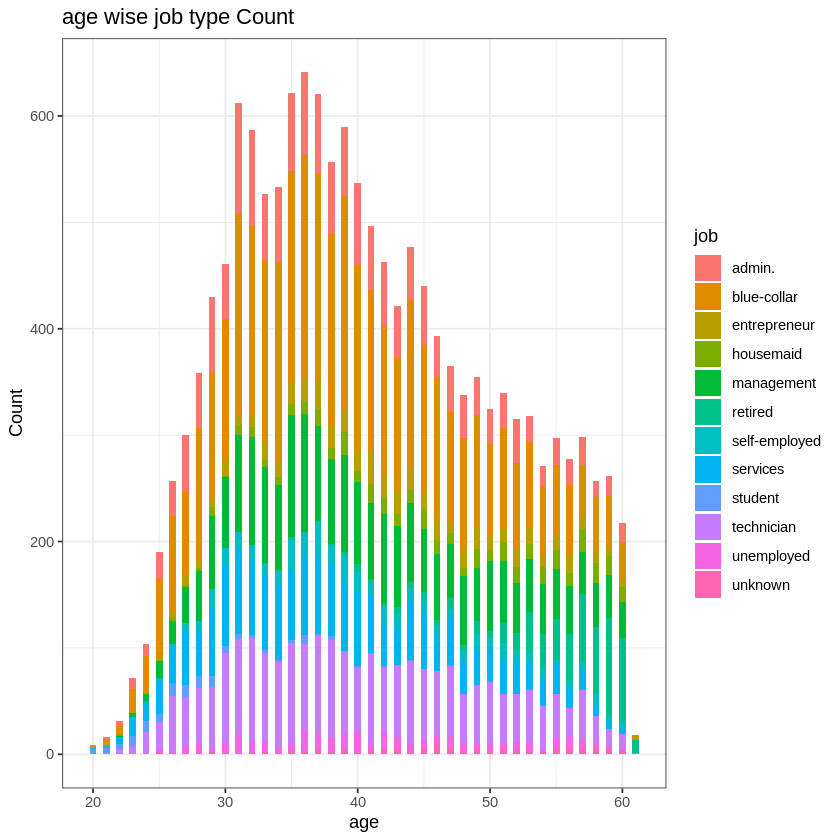

In [ ]:
#count plot by age and job
ggplot(bank_dataframe, aes(age,fill=job))+
geom_bar(stat="count",position='stack', width = 0.5)+  # Stack for stacked chart
 labs(x="age",
         y="Count", 
       title="age wise job type Count")+ 
theme_bw()

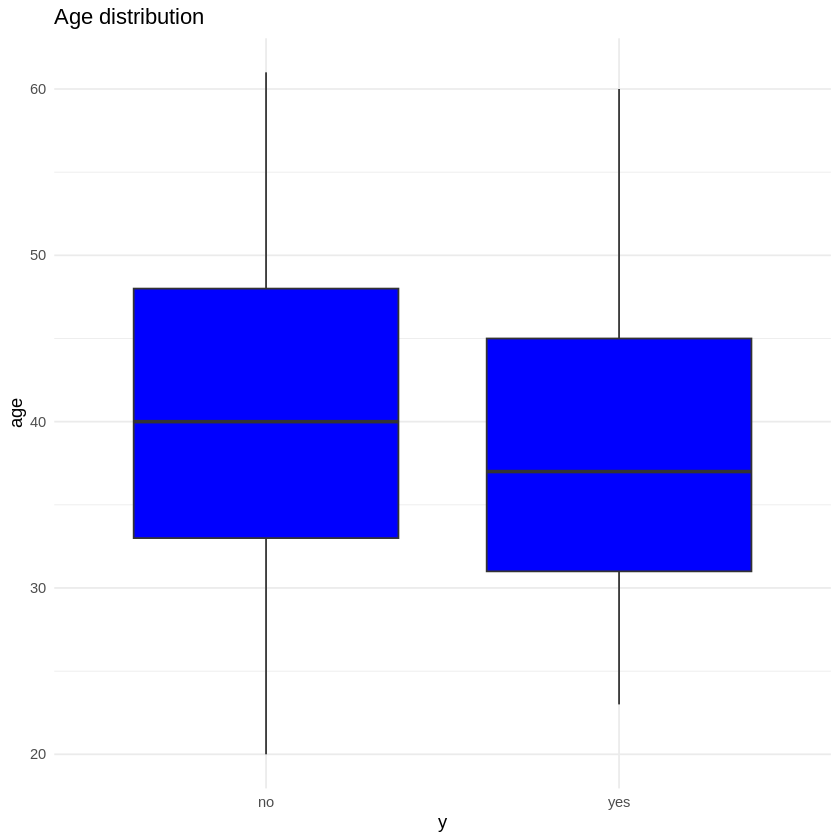

In [ ]:
#box plot of age distribution
ggplot(bank_dataframe, aes(x=y,y=age, fill=Profession)) + geom_boxplot(fill='blue') +theme_minimal() +
  labs(title = "Age distribution")

In [ ]:
#count of row belong to each class - data is imblanced
table(bank_dataframe$y)


   no   yes 
14383   617 

In [ ]:
str(bank_dataframe)

tibble [15,000 × 17] (S3: tbl_df/tbl/data.frame)
 $ age      : num [1:15000] 58 44 33 47 33 35 28 42 58 43 ...
 $ job      : chr [1:15000] "management" "technician" "entrepreneur" "blue-collar" ...
 $ marital  : chr [1:15000] "married" "single" "married" "married" ...
 $ education: chr [1:15000] "tertiary" "secondary" "secondary" "unknown" ...
 $ default  : chr [1:15000] "no" "no" "no" "no" ...
 $ balance  : num [1:15000] 2143 29 2 1506 1 ...
 $ housing  : chr [1:15000] "yes" "yes" "yes" "yes" ...
 $ loan     : chr [1:15000] "no" "no" "yes" "no" ...
 $ contact  : chr [1:15000] "unknown" "unknown" "unknown" "unknown" ...
 $ day      : num [1:15000] 5 5 5 5 5 5 5 5 5 5 ...
 $ month    : chr [1:15000] "may" "may" "may" "may" ...
 $ duration : num [1:15000] 261 151 76 92 198 139 217 380 50 55 ...
 $ campaign : num [1:15000] 1 1 1 1 1 1 1 1 1 1 ...
 $ pdays    : num [1:15000] -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...
 $ previous : num [1:15000] 0 0 0 0 0 0 0 0 0 0 ...
 $ poutcome : chr [1:15000] "u

In [ ]:
#converting categorical value to numeric
cols <- c("job", "marital", "education", "default","housing","loan","contact","month","poutcome")
bank_dataframe[cols] <- lapply(bank_dataframe[cols], factor) 
bank_dataframe[cols] <- sapply(bank_dataframe[cols], unclass)
head(bank_dataframe)


age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
58,5,2,3,1,2143,2,1,3,5,3,261,1,-1,0,1,no
44,10,3,2,1,29,2,1,3,5,3,151,1,-1,0,1,no
33,3,2,2,1,2,2,2,3,5,3,76,1,-1,0,1,no
47,2,2,4,1,1506,2,1,3,5,3,92,1,-1,0,1,no
33,12,3,4,1,1,1,1,3,5,3,198,1,-1,0,1,no
35,5,2,3,1,231,2,1,3,5,3,139,1,-1,0,1,no


In [ ]:
#Data normalization
cols1 = c("balance","duration")
bank_dataframe[cols1] <- lapply(bank_dataframe[cols1],scale)
head(bank_dataframe)

age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
<dbl>,<int>,<int>,<int>,<int>,"<dbl[,1]>",<int>,<int>,<int>,<dbl>,<int>,"<dbl[,1]>",<dbl>,<dbl>,<dbl>,<int>,<chr>
58,5,2,3,1,0.3984031,2,1,3,5,3,0.006296335,1,-1,0,1,no
44,10,3,2,1,-0.4143073,2,1,3,5,3,-0.421584749,1,-1,0,1,no
33,3,2,2,1,-0.4246872,2,2,3,5,3,-0.713321852,1,-1,0,1,no
47,2,2,4,1,0.1535136,2,1,3,5,3,-0.651084603,1,-1,0,1,no
33,12,3,4,1,-0.4250716,1,1,3,5,3,-0.238762831,1,-1,0,1,no
35,5,2,3,1,-0.3366500,2,1,3,5,3,-0.468262685,1,-1,0,1,no


Warning message in cor(subset(bank_dataframe, select = -y)):
“the standard deviation is zero”


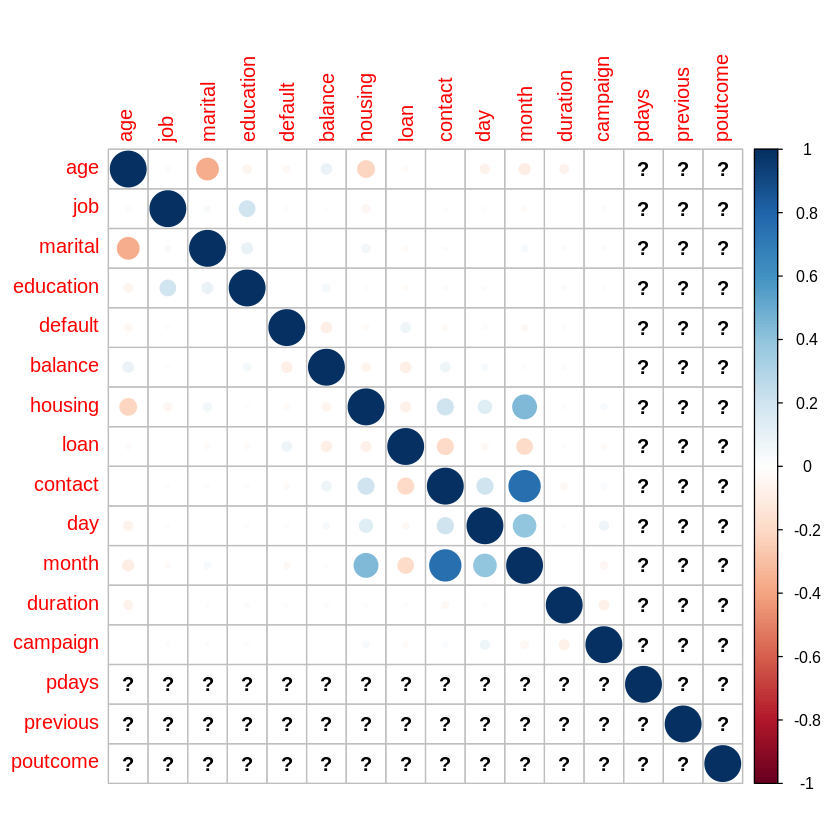

In [ ]:
#correlation plot
corrplot(cor(subset(bank_dataframe, select = -y)), method="circle")

In [ ]:
#converting target class to integer
bank_dataframe$y <- ifelse(bank_dataframe$y=="yes",1,0)
bank_dataframe$y <- as.integer(bank_dataframe$y)
bank_dataframe$y <- factor(bank_dataframe$y, levels = c(0, 1))

In [ ]:
head(bank_dataframe)

age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
<dbl>,<int>,<int>,<int>,<int>,"<dbl[,1]>",<int>,<int>,<int>,<dbl>,<int>,"<dbl[,1]>",<dbl>,<dbl>,<dbl>,<int>,<fct>
58,5,2,3,1,0.3984031,2,1,3,5,3,0.006296335,1,-1,0,1,0
44,10,3,2,1,-0.4143073,2,1,3,5,3,-0.421584749,1,-1,0,1,0
33,3,2,2,1,-0.4246872,2,2,3,5,3,-0.713321852,1,-1,0,1,0
47,2,2,4,1,0.1535136,2,1,3,5,3,-0.651084603,1,-1,0,1,0
33,12,3,4,1,-0.4250716,1,1,3,5,3,-0.238762831,1,-1,0,1,0
35,5,2,3,1,-0.3366500,2,1,3,5,3,-0.468262685,1,-1,0,1,0


In [ ]:
set.seed(1234)
#Splitting in 70:30 TRAIN:TEST
split <- sample.split(bank_dataframe$y, SplitRatio = 0.7)
train <- subset(bank_dataframe, split == "TRUE")
test <- subset(bank_dataframe, split == "FALSE")

In [ ]:
#pca dimension reduction
kpca = kpca(~., data = train[-1], features = 15)

In [ ]:
train_pca = as.data.frame(predict(kpca, train))

In [ ]:
train_pca$y = train$y
head(train_pca) 

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,26.452432,15.088385,-19.663032,-11.529439,-17.3855923,-25.114085,-0.6051277,3.070157,-42.522004,10.828838,-17.606269,-19.100820,-9.419318,3.0860697,7.261841,0
2,-3.744475,23.214463,-40.344662,4.476787,-24.3729997,-5.038038,5.9358897,28.385293,31.889815,4.019873,-19.091921,9.230717,9.871565,-3.6510463,4.731286,0
3,48.950138,4.768680,5.672240,-24.347006,-3.6372488,-38.212865,-4.6471564,-6.512512,-10.912314,1.321857,2.939998,-8.817405,1.277492,-0.2012014,7.509742,0
4,35.981335,3.262448,7.253598,-19.101440,0.6549469,-29.648047,-3.5087750,-5.829607,-2.788818,-1.927610,4.867129,-4.783274,2.117218,-0.3523473,2.977943,0
5,27.223155,15.306198,-20.112447,-11.789361,-17.9700761,-25.640943,-0.6726339,3.122153,-43.301618,11.373049,-17.832715,-19.714121,-9.420851,3.1263990,7.861309,0
6,23.412874,13.991501,-17.854052,-10.352943,-15.2985648,-22.695853,-0.4174832,2.865336,-38.032344,8.674406,-16.045788,-16.174715,-8.588445,2.7875025,6.376877,0


In [ ]:
dim(train_pca)

[1] 10500    16

In [ ]:
#test data
test_pca = as.data.frame(predict(kpca, test))
test_pca$y = test$y

In [ ]:
dim(test_pca)

[1] 4500   16

In [ ]:
#balancing the data with oversampling technique
train_pca <- ovun.sample(y~., data = train_pca, method = "over",2*nrow(subset(train_pca, train_pca$y == 0)))$data

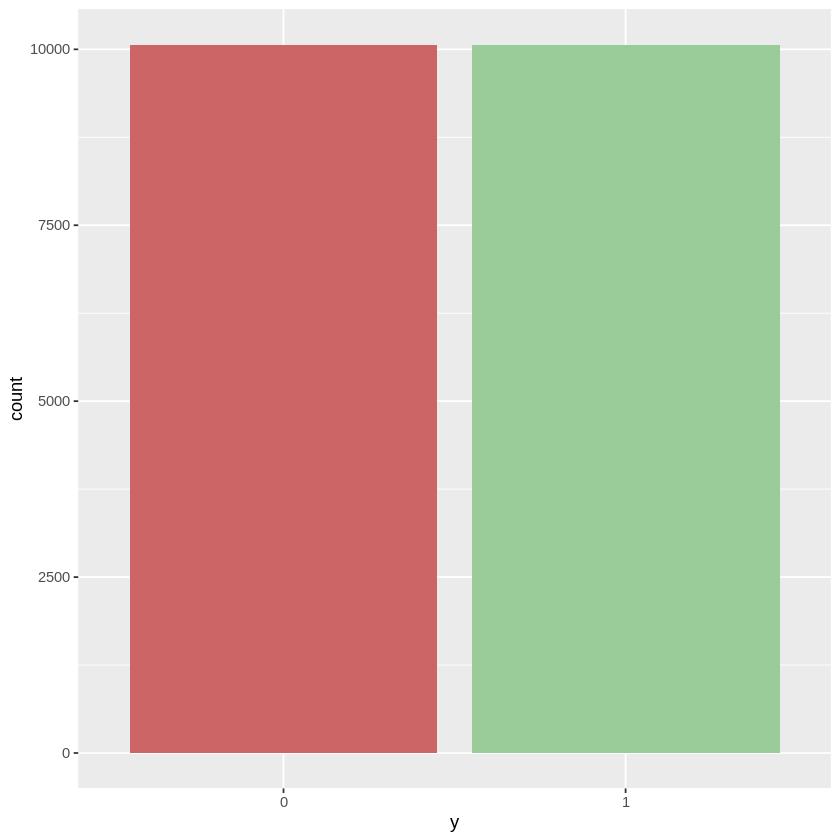

In [ ]:
#balanced plot of target class
ggplot(data=train_pca, aes(x=y))+
  geom_bar( fill=c("#CC6666", "#99CC99")) +
  scale_fill_gradient(low = "green", high = "red")

In [ ]:
#Logistic regression Model
logmodel <- glm(y~. , data = train_pca , family = 'binomial')

In [ ]:
#prediction on test set
prediction <- predict(logmodel, test_pca)

In [ ]:
prediction[prediction>=0.5] = 1
prediction[prediction<0.5] = 0

In [ ]:
table(test_pca$y , prediction)

   prediction
       0    1
  0 3549  766
  1  152   33

In [ ]:
summary(logmodel)


Call:
glm(formula = y ~ ., family = "binomial", data = train_pca)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1204  -1.1221   0.1291   1.0513   1.7751  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.2117781  0.0160053 -13.232  < 2e-16 ***
V1          -0.0097610  0.0009333 -10.459  < 2e-16 ***
V2           0.0065728  0.0009933   6.617 3.66e-11 ***
V3           0.0010960  0.0010532   1.041 0.298051    
V4          -0.0016495  0.0010727  -1.538 0.124102    
V5           0.0103958  0.0011563   8.991  < 2e-16 ***
V6          -0.0018136  0.0011592  -1.565 0.117682    
V7           0.0042772  0.0012162   3.517 0.000437 ***
V8          -0.0001482  0.0013952  -0.106 0.915394    
V9           0.0065505  0.0015181   4.315 1.60e-05 ***
V10         -0.0309806  0.0015466 -20.031  < 2e-16 ***
V11         -0.0102231  0.0014885  -6.868 6.51e-12 ***
V12          0.0274539  0.0015675  17.515  < 2e-16 ***
V13         -0.0239944  0.0016892 

In [ ]:
conf_mat <- confusion_matrix(targets = test_pca$y,
                             predictions = prediction)

Warning message in plot_confusion_matrix(conf_mat$`Confusion Matrix`[[1]], palette = "Oranges"):
“'ggimage' is missing. Will not plot arrows and zero-shading.”
Warning message in plot_confusion_matrix(conf_mat$`Confusion Matrix`[[1]], palette = "Oranges"):
“'rsvg' is missing. Will not plot arrows and zero-shading.”


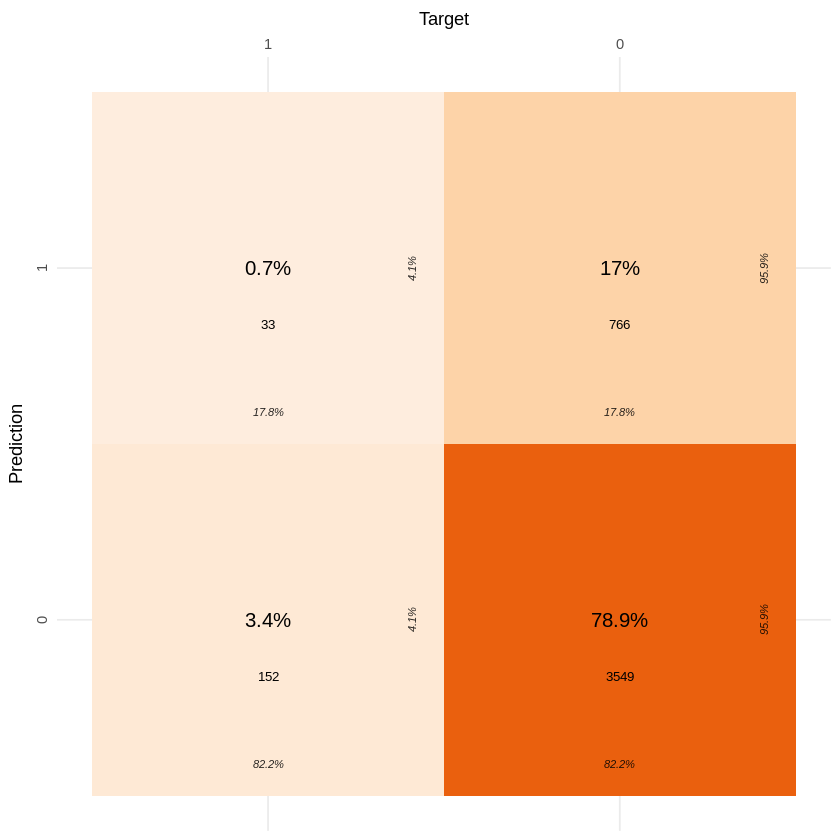

In [ ]:
plot_confusion_matrix(conf_mat$`Confusion Matrix`[[1]],palette = "Oranges")

In [ ]:
confusionMatrix(table(test_pca$y , prediction))

Confusion Matrix and Statistics

   prediction
       0    1
  0 3549  766
  1  152   33
                                          
               Accuracy : 0.796           
                 95% CI : (0.7839, 0.8077)
    No Information Rate : 0.8224          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 3e-04           
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.9589          
            Specificity : 0.0413          
         Pos Pred Value : 0.8225          
         Neg Pred Value : 0.1784          
             Prevalence : 0.8224          
         Detection Rate : 0.7887          
   Detection Prevalence : 0.9589          
      Balanced Accuracy : 0.5001          
                                          
       'Positive' Class : 0               
                                          